In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [29]:
df=pd.read_csv(r"C:\Users\bijja\OneDrive\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [30]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [31]:
df_cleaned = df.dropna()

In [32]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [33]:
df_cleaned = df.dropna()

In [34]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
label_encoder = LabelEncoder()
df["encoded_column"] = label_encoder.fit_transform(df["SeniorCitizen"])

In [36]:
label_encoder

LabelEncoder()

In [37]:
multi_category_columns = ['InternetService', 'PaymentMethod', 'Contract']
df = pd.get_dummies(df, columns=multi_category_columns, drop_first=True)

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines OnlineSecurity OnlineBackup  ... TotalCharges Churn  \
0  No phone service             No          Yes  ...        29.85    No   
1                No            Yes           No  ...       1889.5    No   
2                No            Yes          Yes  ...       108.15   Yes   
3  No phone service            Yes           No  ...      1840.75    No   
4                No             No           No  ...       151.65   Yes   

  encoded_column InternetService_Fiber optic InternetService_No  \
0

In [38]:
multi_category_columns 

['InternetService', 'PaymentMethod', 'Contract']

In [40]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,encoded_column
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.162147
std,0.368612,24.559481,30.090047,0.368612
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,0.000000
max,1.000000,72.000000,118.750000,1.000000


In [44]:
columns=["SeniorCitizen","tenure","MonthlyCharges",	"encoded_column"]
df_corr=df[columns].corr()

<Axes: >

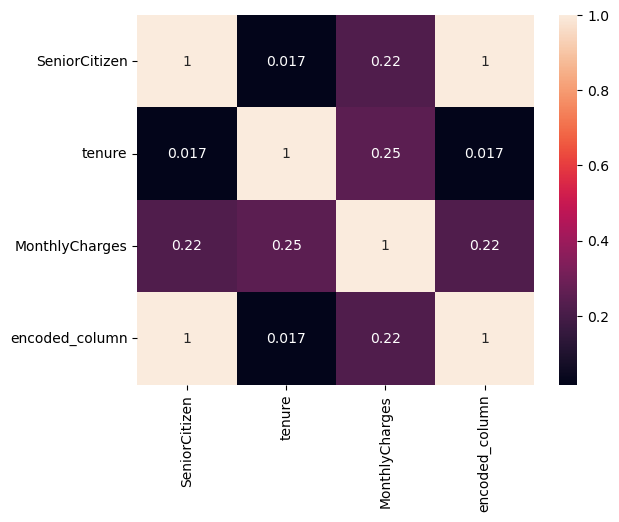

In [45]:
#heatmap
import seaborn as sns
sns.heatmap(df_corr,annot=True)

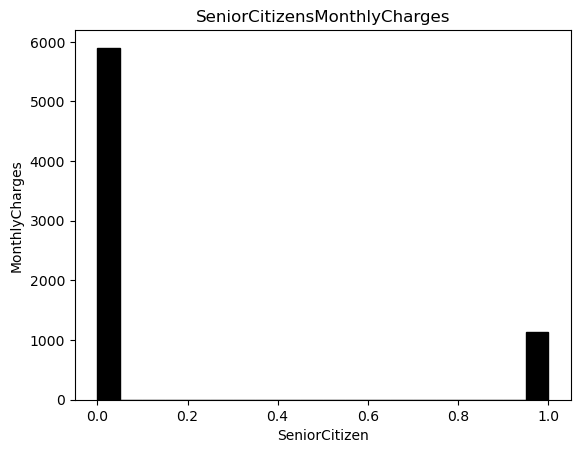

In [47]:
plt.hist(df['SeniorCitizen'], bins=20, color='black', edgecolor='black')
plt.xlabel("SeniorCitizen")
plt.ylabel("MonthlyCharges")
plt.title("SeniorCitizensMonthlyCharges")
plt.show()

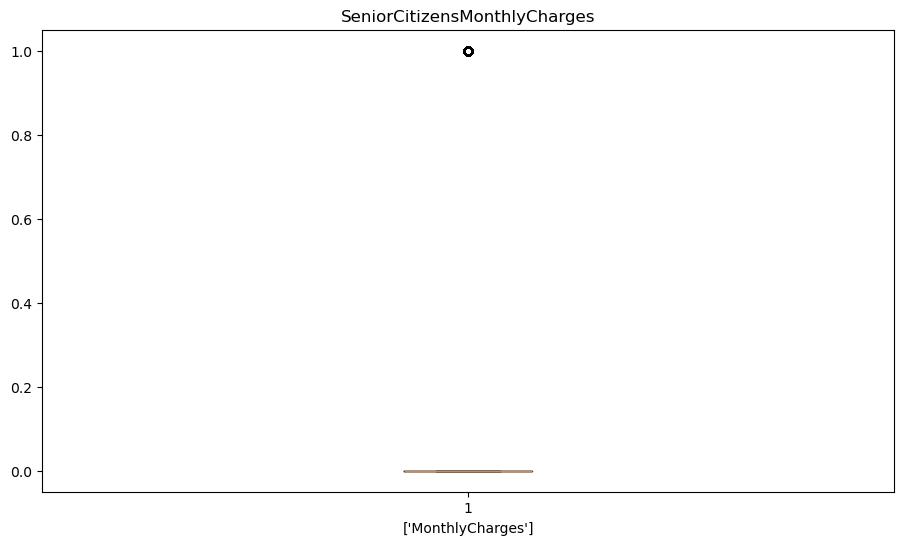

In [49]:
plt.figure(figsize=(11, 6))
plt.boxplot(df['SeniorCitizen'])
plt.xlabel(["MonthlyCharges"])
plt.title("SeniorCitizensMonthlyCharges")
plt.show()

In [50]:
X = df.drop('Churn', axis=1)  
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,encoded_column,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,29.85,No,0,False,False,False,True,False,False,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,1889.5,No,0,False,False,False,False,True,True,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,108.15,Yes,0,False,False,False,False,True,False,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,1840.75,No,0,False,False,False,False,False,True,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,151.65,Yes,0,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,...,1990.5,No,0,False,False,False,False,True,True,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,...,7362.9,No,0,True,False,True,False,False,True,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,...,346.45,No,0,False,False,False,True,False,False,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,...,306.6,Yes,1,True,False,False,False,True,False,False
